# 影響學生考試表現因素分析

## 資料庫： 
https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams

In [208]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

In [209]:
df = pd.read_csv('exams_dataset.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 考前準備課程對於各科分數是否有影響

compeleted vs none:
math: Ttest_indResult(statistic=4.851067358628652, pvalue=1.5281672114629787e-06)
reading: Ttest_indResult(statistic=8.148867384336372, pvalue=1.6679706013397365e-15)
writing: Ttest_indResult(statistic=10.749916051747288, pvalue=4.412374310649464e-25)


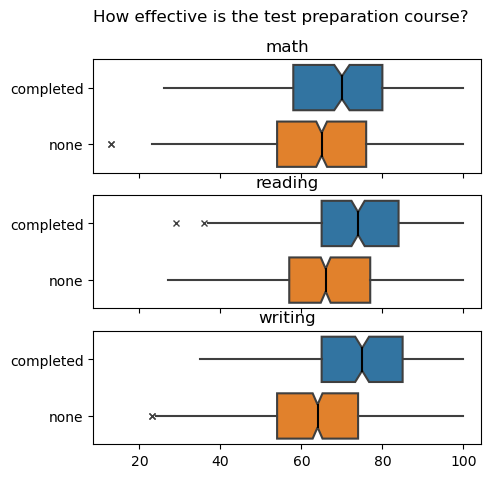

In [227]:
import seaborn as sns

print('compeleted vs none:')
for sub in ['math', 'reading', 'writing']:
    pre = ['completed', 'none']
    x = df[df['test preparation course'] == f'{pre[0]}'][f'{sub} score']
    y = df[df['test preparation course'] == f'{pre[1]}'][f'{sub} score']
        
    print(f'{sub}:', stats.ttest_ind(a = x, b= y, equal_var= False))

fig, axes = plt.subplots(3, 1, figsize = (5,5), sharex = True)
fig.suptitle('How effective is the test preparation course?')

subject = ['math', 'reading', 'writing']

for num in range(3):
    sns.boxplot(ax = axes[num], data = df, x = f'{subject[num]} score', y = 'test preparation course', notch = True, flierprops = {'marker': 'x'}, medianprops = {'color':'black'}, showcaps = False)
    axes[num].set_title(f'{subject[num]}')
    axes[num].set_ylabel(None)
    axes[num].set_xlabel(None)

基本上三科科目的‘有完成課程’以及‘沒有完成課程’分數之間的P值皆低於顯著水準5%，表示兩者間有明顯差異，加上以上圖表，可以由此推論考前準備課程對於分數的提升是有幫助的。

## 考前空腹/減少飲食是否對分數有影響？更好或更差？

standard vs free/reduced:
math: Ttest_indResult(statistic=12.539523472968739, pvalue=1.4212747544579433e-32)
reading: Ttest_indResult(statistic=9.247454951570218, pvalue=3.1985509655977886e-19)
writing: Ttest_indResult(statistic=10.44927546482385, pvalue=8.690771927098749e-24)


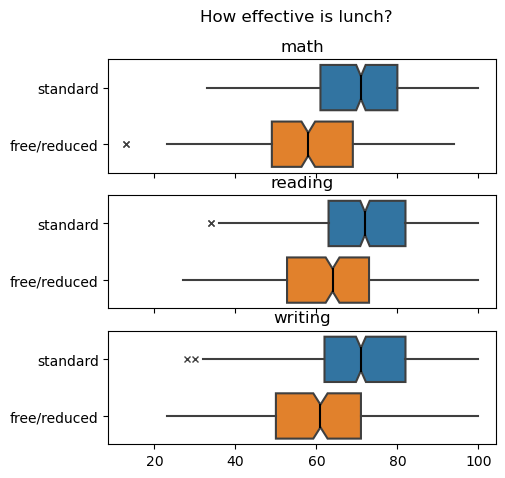

In [225]:
print('standard vs free/reduced:')
for sub in ['math', 'reading', 'writing']:
    pre = ['standard', 'free/reduced']
    x = df[df['lunch'] == f'{pre[0]}'][f'{sub} score']
    y = df[df['lunch'] == f'{pre[1]}'][f'{sub} score']
        
    print(f'{sub}:', stats.ttest_ind(a = x, b= y, equal_var= False))

fig, axes = plt.subplots(3, 1, figsize = (5,5), sharex = True)
fig.suptitle('How effective is lunch?')

subject = ['math', 'reading', 'writing']

for num in range(3):
    sns.boxplot(ax = axes[num], data = df, x = f'{subject[num]} score', y = 'lunch', notch = True, flierprops = {'marker': 'x'}, medianprops = {'color':'black'}, showcaps = False)
    axes[num].set_title(f'{subject[num]}')
    axes[num].set_ylabel(None)
    axes[num].set_xlabel(None)

根據p-value與圖表我們可以得知：考前改變飲食習慣確實是會對成績造成影響，而且是負面的影響，相比考前正常飲食，改變飲食的三科成績有點明顯退步。

## 父母教育程度程對於各科分數是否有影響

math:
F_onewayResult(statistic=12.047166599341464, pvalue=2.4003324786813918e-11)
reading:
F_onewayResult(statistic=10.870238535391323, pvalue=3.368530853208258e-10)
writing:
F_onewayResult(statistic=15.754223177856845, pvalue=5.980567876932221e-15)


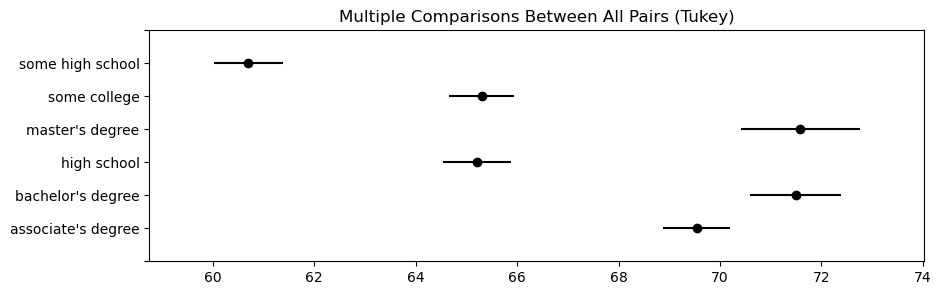

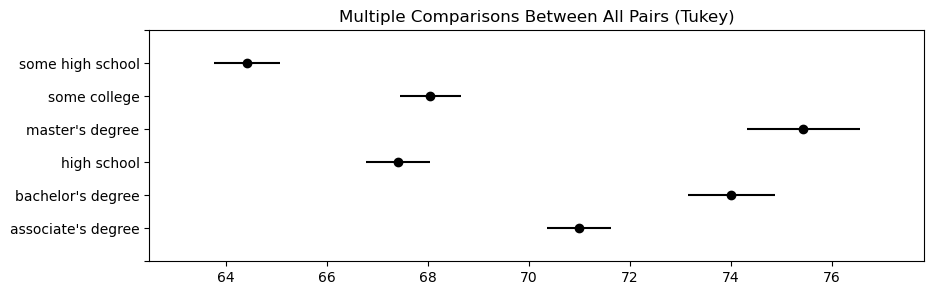

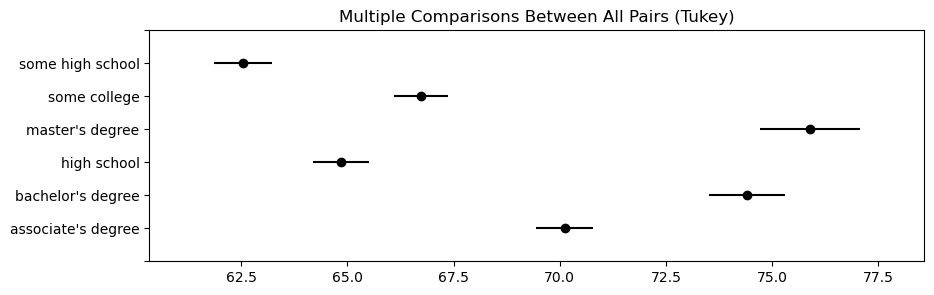

In [252]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

groups = df.groupby('parental level of education').groups

degrees = df['parental level of education'].unique()
sub = ['math', 'reading', 'writing']

for x in sub:
    a = df[f'{x} score'][groups[f'{degrees[0]}']]
    b = df[f'{x} score'][groups[f'{degrees[1]}']]
    c = df[f'{x} score'][groups[f'{degrees[2]}']]
    d = df[f'{x} score'][groups[f'{degrees[3]}']]
    e = df[f'{x} score'][groups[f'{degrees[4]}']]
    f = df[f'{x} score'][groups[f'{degrees[5]}']]
    
    print(f'{x}:')
    print(stats.f_oneway(a,b,c,d,e,f))

    t = pairwise_tukeyhsd(endog=df[f'{x} score'], groups=df['parental level of education'], alpha=0.95)
    t.plot_simultaneous(figsize=(10,3), )
    #t.summary()

從上述數值跟圖表中可以發現，不同的教育程度與各科成績之間的差異並非巧合的可能性非常高。 \
bachelor's degree 跟 master's degree不管在哪一科都表現都是最好的，associate's degree在其後。代表父母的教育程度是會影響成績的可能性非常高。

## 對於分數影響最大的變數

在chi-square test of independence中，兩變數的p-value愈低表示兩者間的關係愈有可能互相影響，反之則相反。

In [213]:
# 60

sub = ['math', 'reading', 'writing']
factors = list(df.columns[:5])

for x in sub:
    for y in factors:
        subject = np.where(df[f'{x} score']>=60, 1, 0)
        obseved = pd.crosstab(index = df[f'{y}'], columns=subject)
        p_value = stats.chi2_contingency(observed=obseved)[1]
        print(f'Subject: {x}, Factor: {y}, P-value: {p_value}')
    print('===========')


Subject: math, Factor: gender, P-value: 4.327453315859715e-07
Subject: math, Factor: race/ethnicity, P-value: 8.606440583769172e-09
Subject: math, Factor: parental level of education, P-value: 1.3038966941106568e-06
Subject: math, Factor: lunch, P-value: 7.991906038402147e-23
Subject: math, Factor: test preparation course, P-value: 0.03659940205943433
Subject: reading, Factor: gender, P-value: 0.00021136247670793947
Subject: reading, Factor: race/ethnicity, P-value: 0.0013115634444564267
Subject: reading, Factor: parental level of education, P-value: 0.00040600676669462395
Subject: reading, Factor: lunch, P-value: 8.774296142015978e-11
Subject: reading, Factor: test preparation course, P-value: 3.060148315231233e-10
Subject: writing, Factor: gender, P-value: 6.85909966324548e-08
Subject: writing, Factor: race/ethnicity, P-value: 0.00117283769110293
Subject: writing, Factor: parental level of education, P-value: 8.278387435600882e-05
Subject: writing, Factor: lunch, P-value: 1.579014804

In [214]:
# above 80

sub = ['math', 'reading', 'writing']
factors = list(df.columns[:5])

for x in sub:
    for y in factors:
        subject = np.where(df[f'{x} score']>=80, 1, 0)
        obseved = pd.crosstab(index = df[f'{y}'], columns=subject)
        p_value = stats.chi2_contingency(observed=obseved)[1]
        print(f'Subject: {x}, Factor: {y}, P-value: {p_value}')
    print('===========')

Subject: math, Factor: gender, P-value: 0.0010176392760614925
Subject: math, Factor: race/ethnicity, P-value: 1.8123218812079319e-10
Subject: math, Factor: parental level of education, P-value: 1.2939907034380897e-06
Subject: math, Factor: lunch, P-value: 1.0316435240096337e-09
Subject: math, Factor: test preparation course, P-value: 0.0006877551762105615
Subject: reading, Factor: gender, P-value: 8.759161906884823e-06
Subject: reading, Factor: race/ethnicity, P-value: 7.933844314943145e-07
Subject: reading, Factor: parental level of education, P-value: 5.829797768579974e-07
Subject: reading, Factor: lunch, P-value: 2.3742472695834267e-08
Subject: reading, Factor: test preparation course, P-value: 6.844278540721021e-09
Subject: writing, Factor: gender, P-value: 3.046698744532065e-10
Subject: writing, Factor: race/ethnicity, P-value: 2.1193993276780797e-05
Subject: writing, Factor: parental level of education, P-value: 1.641902048185605e-12
Subject: writing, Factor: lunch, P-value: 1.95

有趣的是，當設定分數的分界點（代表好與差）為60分時，得出的結果皆表示'午餐'是影響成績最大因素的可能性最高; \
但當設定為80與90以上時會變為： '種族'影響數學可能性最大，閱讀與寫作則分別是'考前準備課程'與'父母教育程度'佔最大可能影響分子。